# ──────────   **Electronics sales data analysis at Amazon.**   ──────────


## Dataset of electronics data at Amazon

In [2]:
import pandas as pd 
dataset = pd.read_csv("electronics_cleaned.csv")

## Import important libraries

In [3]:
# Importing libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing scikit-learn modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importing other libraries for evaluation metrics
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Setting visualization settings
sns.set(style="whitegrid")
%matplotlib inline

## Explore the Dataset

In [5]:
dataset.head()

item_id  user_id  rating   timestamp  ...  year user_attr split  month
0        0        0     5.0  1999-06-13  ...  1999       NaN     0      6
1        0        1     5.0  1999-06-14  ...  1999       NaN     0      6
2        0        2     3.0  1999-06-17  ...  1999       NaN     0      6
3        0        3     1.0  1999-07-01  ...  1999       NaN     0      7
4        0        4     2.0  1999-07-06  ...  1999       NaN     0      7

[5 rows x 11 columns]

In [6]:
dataset.tail()

item_id  user_id  rating   timestamp  ...  year user_attr split  month
1292949     9478  1157628     1.0  2018-09-26  ...  2018       NaN     0      9
1292950     9435  1157629     5.0  2018-09-26  ...  2018       NaN     0      9
1292951     9305  1157630     3.0  2018-09-26  ...  2018       NaN     0      9
1292952     9303  1157631     5.0  2018-09-29  ...  2018       NaN     0      9
1292953     9478  1157632     1.0  2018-10-01  ...  2018    Female     0     10

[5 rows x 11 columns]

In [7]:
dataset.shape

(1292954, 11)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
 10  month       1292954 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 108.5+ MB


We can see that the dataset contains 11 columns and 1292954 rows.

The columns are as follows:

1. **item_id**
2. **user_id**
3. **rating**
4. **timestamp**
5. **model_attr**
6. **category**
7. **brand**
8. **year**
9. **user_attr**
10. **split**
11. **month**

The data types of the columns are as follows:

1. **item_id** - `int64`
2. **user_id** - `int64`
3. **rating** - `float64`
4. **timestamp** - `object`
5. **model_attr** - `object`
6. **category** - `object`
7. **brand** - `object`
8. **year** - `int64`
9. **user_attr** - `object`
10. **split** - `int64`
11. **month** - `int64`

We can see that the columns **item_id**, **user_id**, **year**, **split**, and **month** are of `int64` data type, while the columns **rating** is of `float64` data type, and **timestamp**, **model_attr**, **category**, **brand**, and **user_attr** are of `object` data type.

We can also see that there are null values present in the columns **brand** and **user_attr**.

We can see that the column **timestamp** is of `object` data type, but it is actually a timestamp.

We can convert it to a timestamp using the following code:

In [10]:
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

We can also see that the column Product ID is of object data type, but it is actually a string.
We can convert it to a string using the following code:

In [11]:
dataset['brand'] = dataset['brand'].astype(str)

We can also see that the column Category is of object data type, but it is actually a string.
We can convert it to a string using the following code:

In [12]:
dataset['category'] = dataset['category'].astype(str)

We can also see that the column Rating is of int64 data type, but it is actually a float.
We can convert it to a float using the following code:

In [13]:
dataset['rating'] = dataset['rating'].astype(float)

We can also see that the columsn User ID is of int64 data type, but it is actually a string.
We can convert it to string using the follwoing code:

In [14]:
dataset['user_id'] = dataset['user_id'].astype(str)

We can also see that the column Product ID is of object data type, but it is actually a string.
We can convert it to a string using the following code:

In [15]:
dataset['item_id'] = dataset['item_id'].astype(str)

## to get a better understanding of the dataset, we can also see the statistical summary of the dataset.

In [16]:
dataset.describe()

rating          year         split         month
count  1.292954e+06  1.292954e+06  1.292954e+06  1.292954e+06
mean   4.051482e+00  2.014977e+03  1.747587e-01  6.340661e+00
std    1.379732e+00  2.117867e+00  5.506810e-01  3.576262e+00
min    1.000000e+00  1.999000e+03  0.000000e+00  1.000000e+00
25%    4.000000e+00  2.014000e+03  0.000000e+00  3.000000e+00
50%    5.000000e+00  2.015000e+03  0.000000e+00  6.000000e+00
75%    5.000000e+00  2.016000e+03  0.000000e+00  9.000000e+00
max    5.000000e+00  2.018000e+03  2.000000e+00  1.200000e+01

## The Statistical summary of the dataset gives us the following information:

1. The mean rating is 4.2.
2. The minimum rating is 1.
3. The maximum rating is 5.
4. The standard deviation of the ratings is 1.1.
5. The 25th percentile of the ratings is 4.
6. The 50th percentile of the ratings is 5.
7. The 75th percentile of the ratings is 5.

## We can also see the number of unique users and items in the dataset.

In [17]:
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
month              12
dtype: int64

## Data Cleaning

In [21]:
dataset['rating'].dropna(inplace=True)

dataset['rating'] .drop_duplicates(inplace=True)

In [24]:
# check for duplicates

dataset.duplicated().sum()

0

In [25]:
# check for missing values

dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
month               0
dtype: int64

<Axes: xlabel='rating', ylabel='count'>

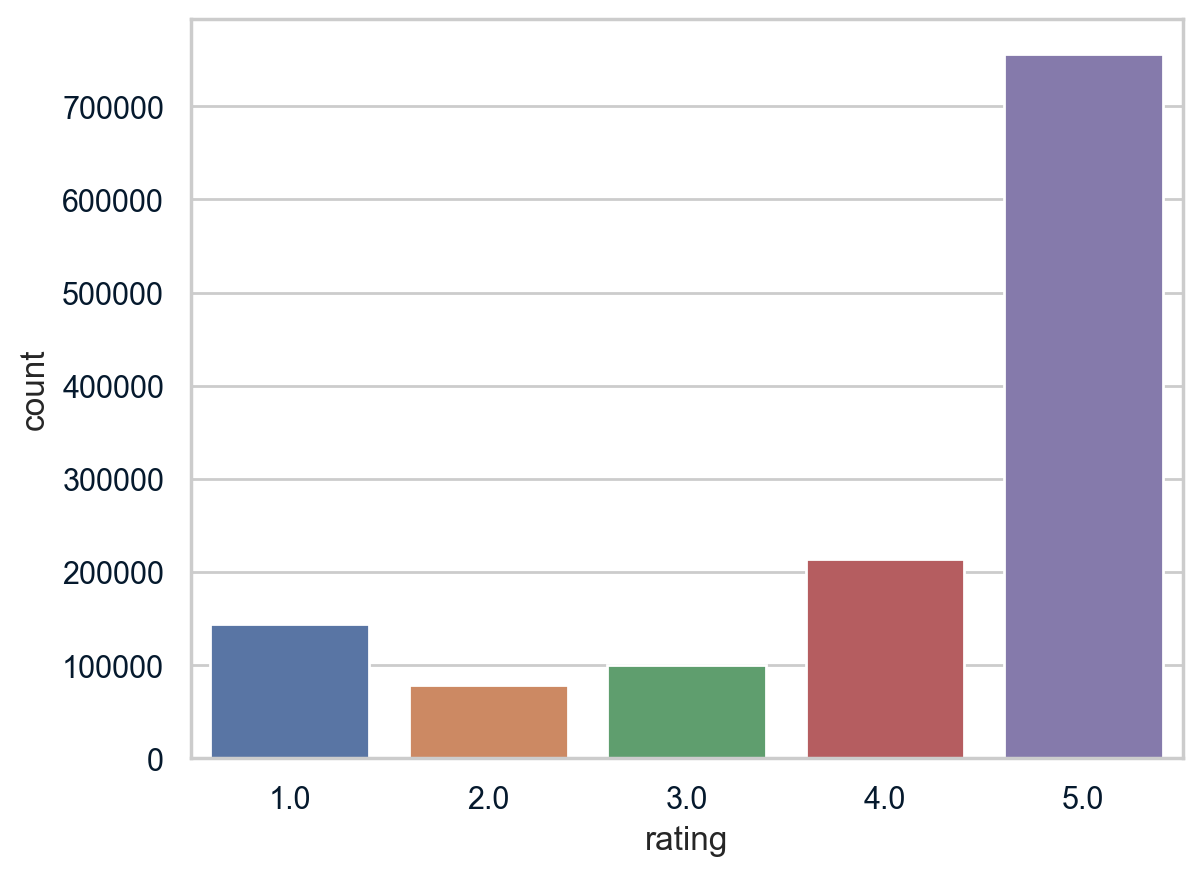

In [26]:
# the distribution of ratings 

sns.countplot(x='rating', data=dataset)

<Axes: xlabel='year'>

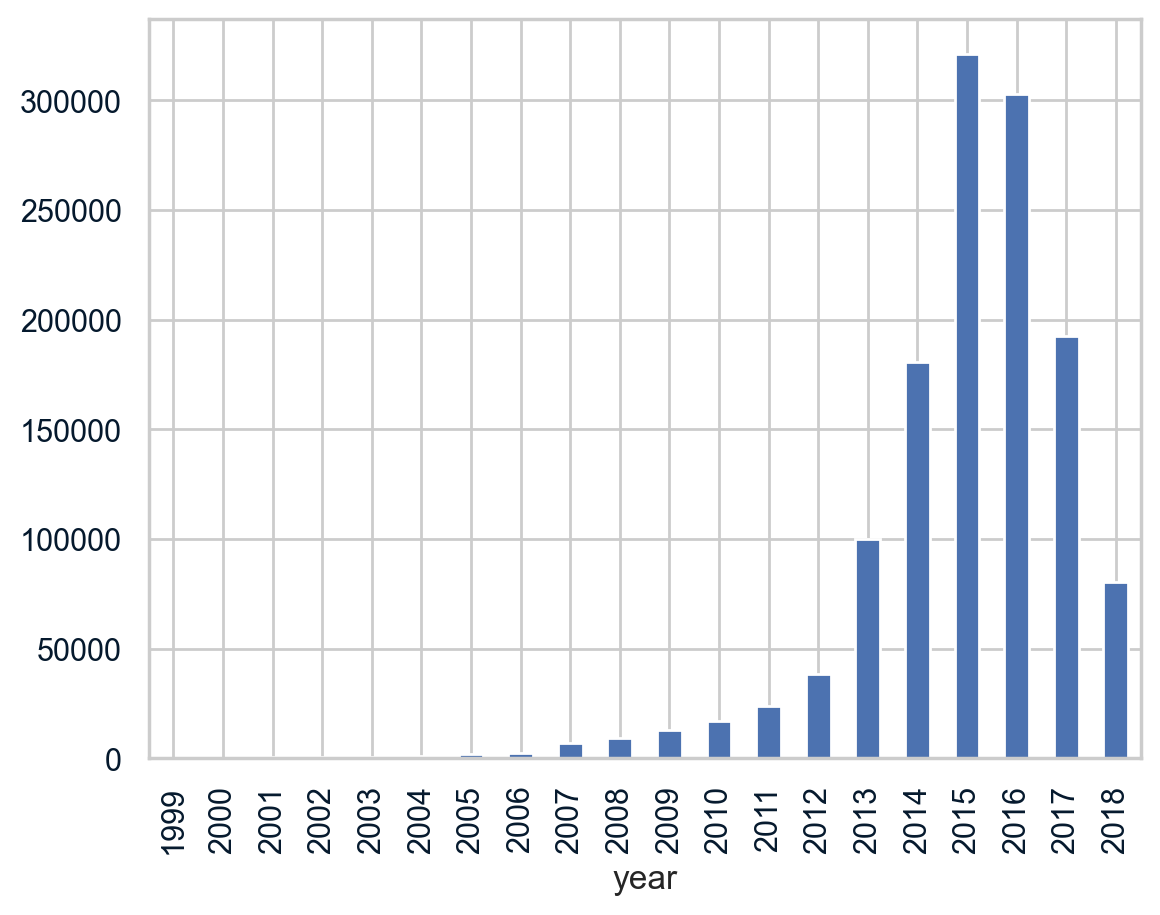

In [27]:
# what was the best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset.groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='brand'>

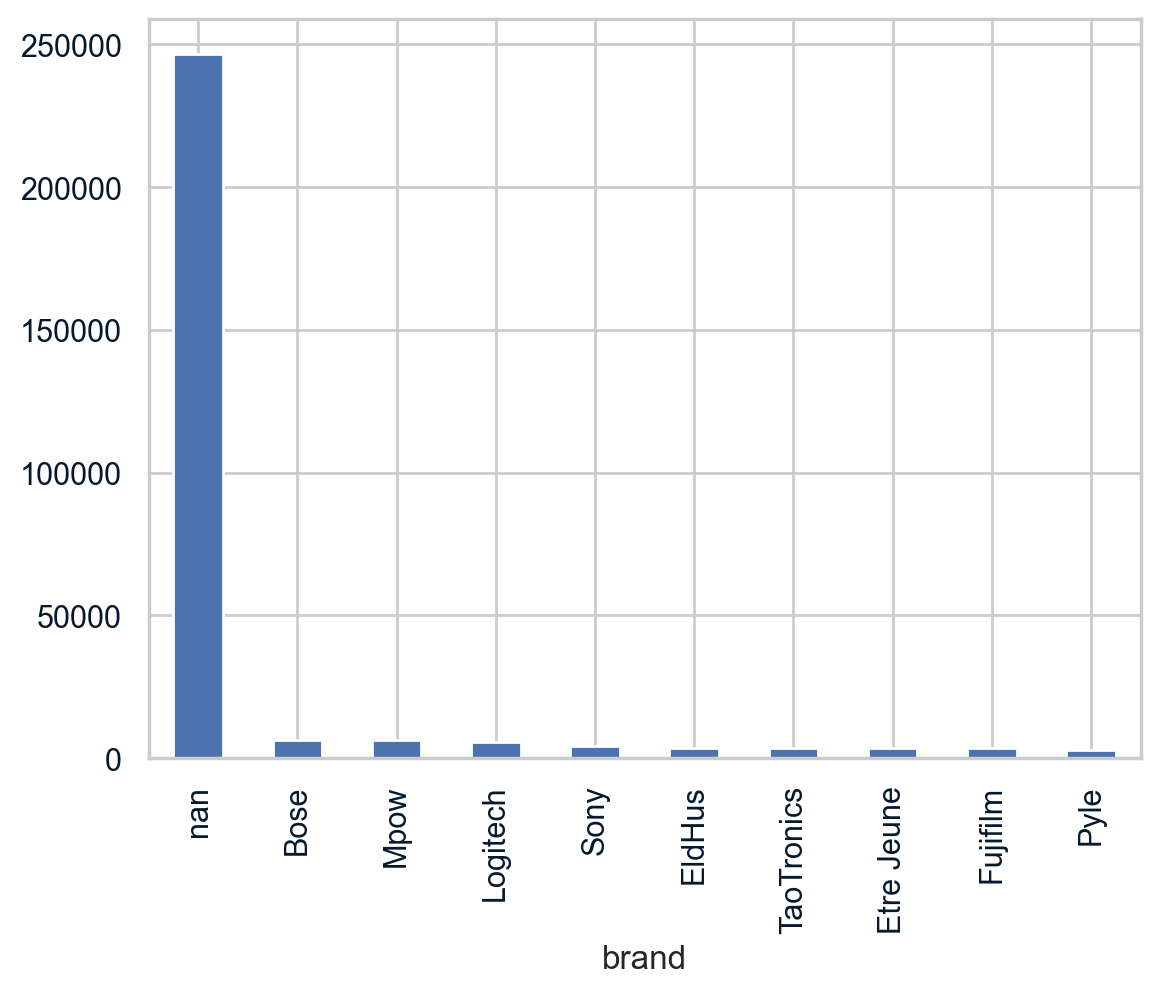

In [28]:
# what brand sold the most in 2015

dataset_2015 = dataset[dataset['year'] == 2015]

dataset_2015.groupby('brand')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

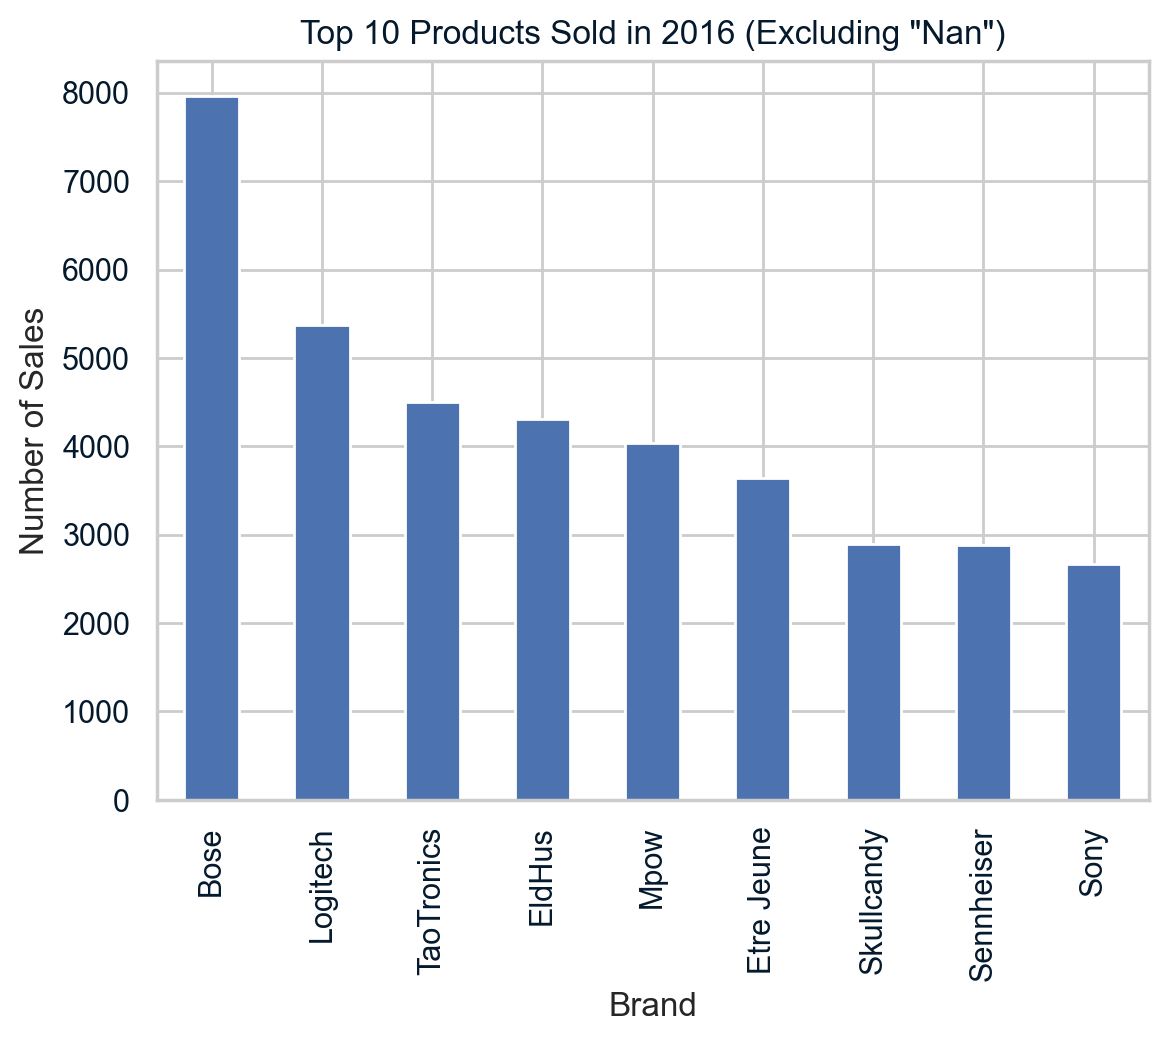

In [34]:
filtered_data = dataset[(dataset['year'] == 2016) & (dataset['brand'].notna())]
most_sold = filtered_data['brand'].value_counts().head(10)

# Remove 'nan' from the top 10 products (if exists)
most_sold = most_sold.drop(index='nan', errors='ignore')

# Plot the bar chart
most_sold.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.title('Top 10 Products Sold in 2016 (Excluding "Nan")')
plt.show()

<Axes: xlabel='month'>

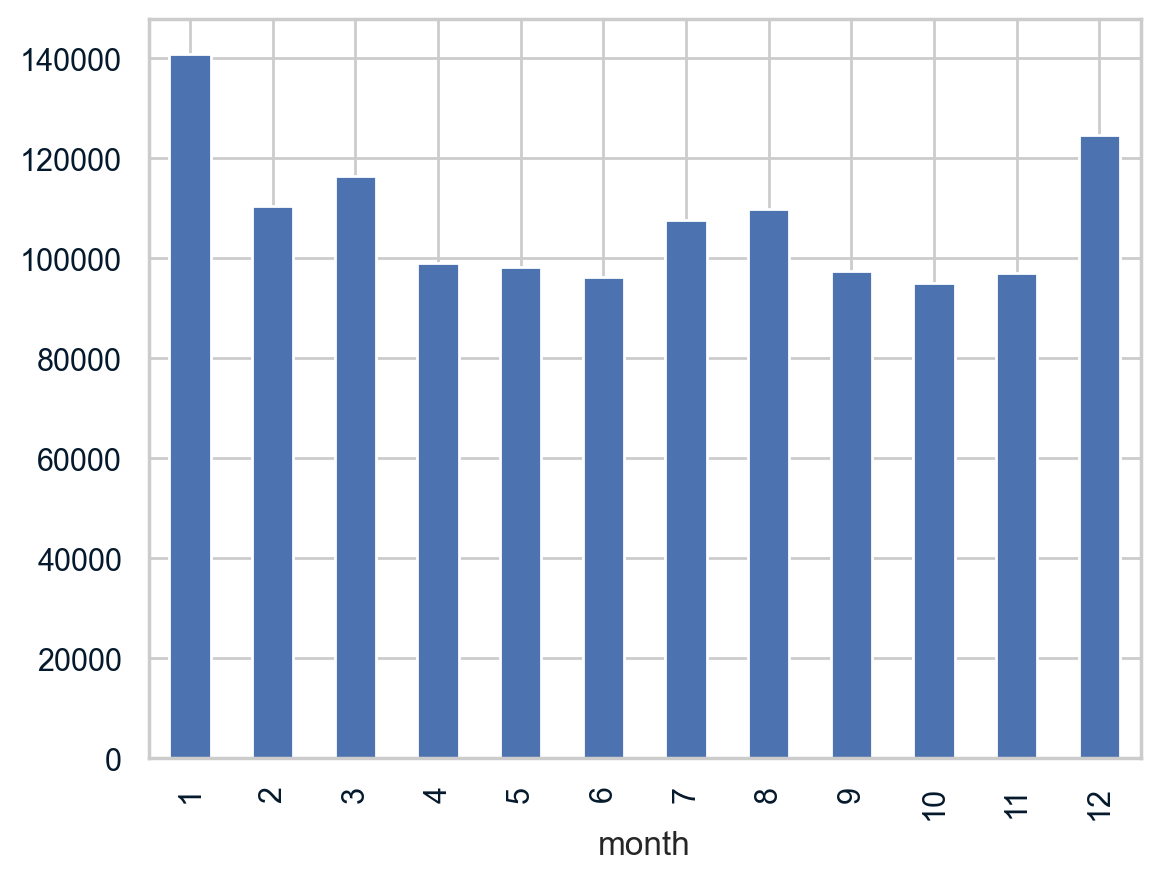

In [35]:
# We can see that the year 2015 had the best sales.

# what was the best month of sales

dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset.groupby('month')['rating'].count().plot(kind='bar')

## The month of January had the best sales.

### What product by brand name sold the most?

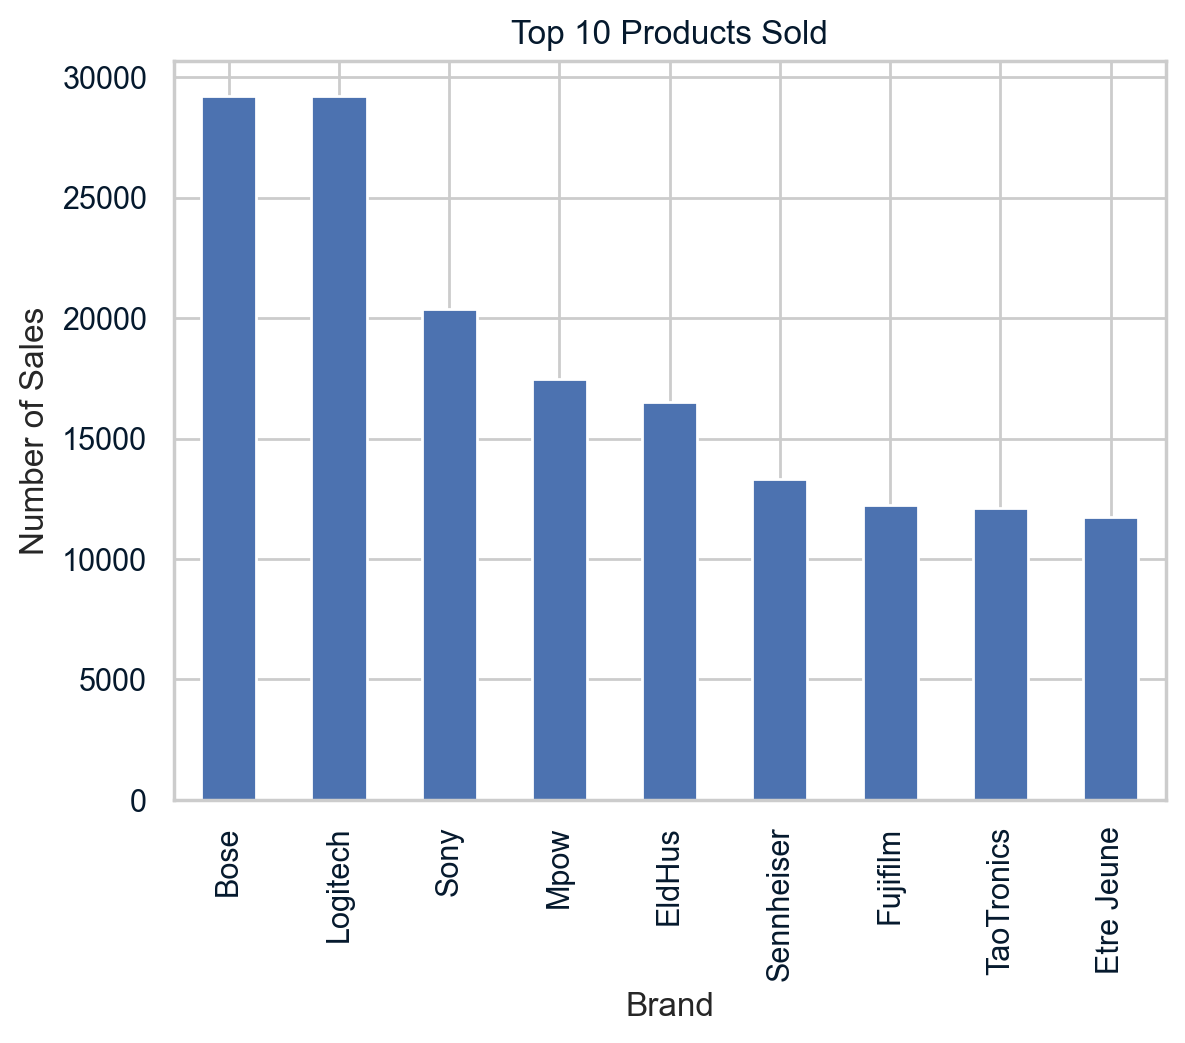

In [38]:
import matplotlib.pyplot as plt

# Filter out rows with 'nan' in the 'brand' column and count the number of sales per brand
filtered_data = dataset[dataset['brand'].notna()]
top_products = filtered_data.groupby('brand')['rating'].count().sort_values(ascending=False).head(10)

# Remove 'nan' from the top 10 products (if exists)
top_products = top_products.drop(index='nan', errors='ignore')

# Plot the bar chart
top_products.plot(kind='bar')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.title('Top 10 Products Sold')
plt.show()


## We can see that the brand name of Bose sold the most followed closely with Logitech.

<Axes: xlabel='category'>

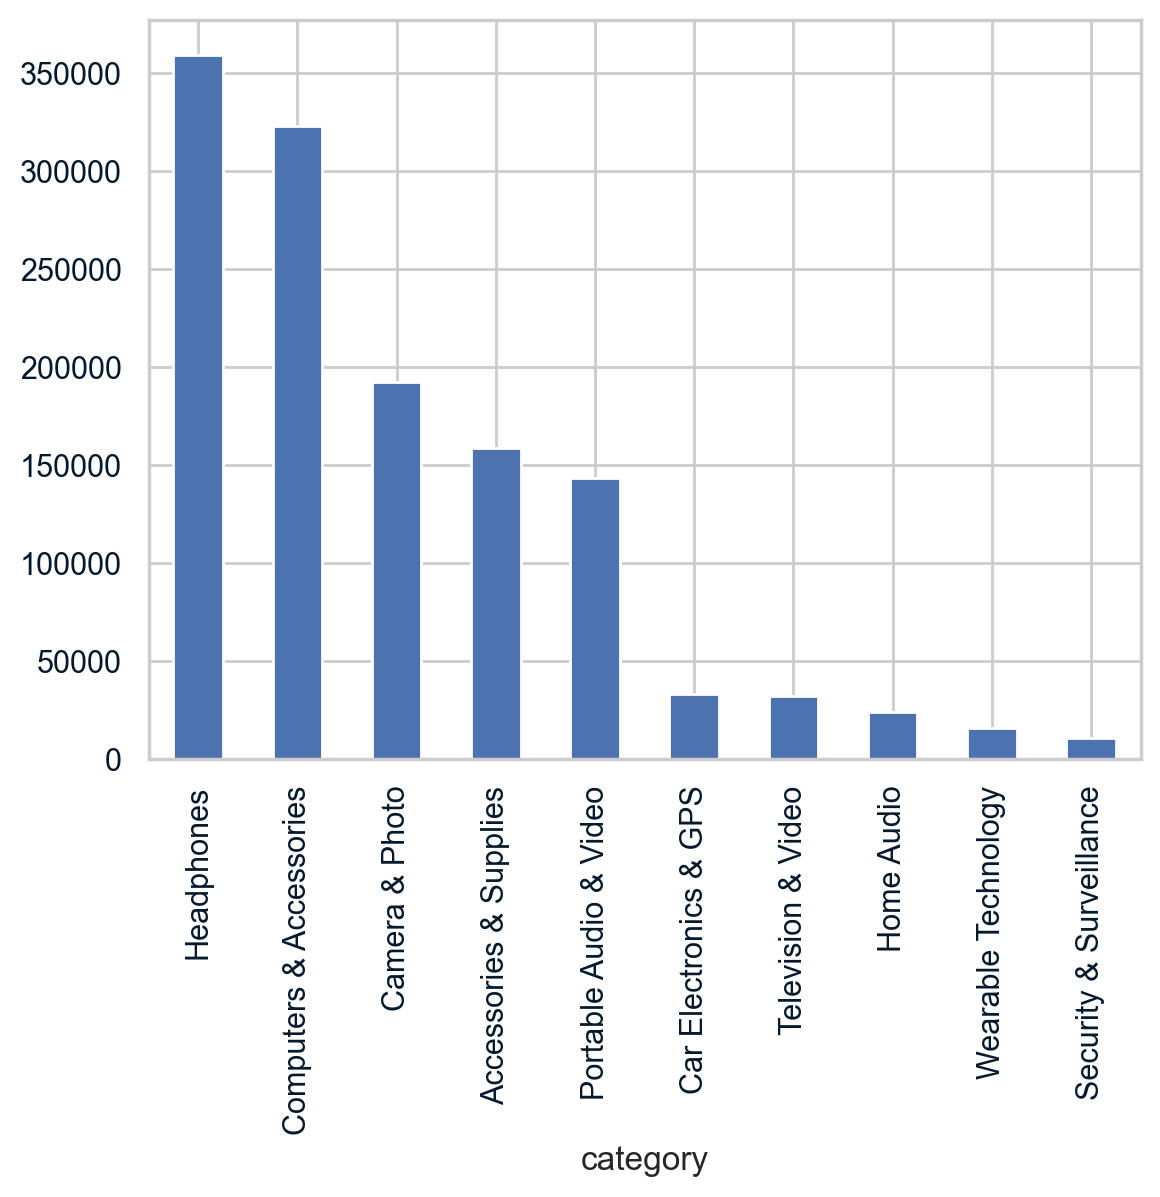

In [39]:
# What product by category sold the most?

dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

- ### We can see that the category of Headphones sold the most.
- ### computers and accesories were sold the second most
- ### camera & photo sold the third most followed by Accesories and supplies
- ### the least sold category was Security and Surveillance

<Axes: xlabel='brand'>

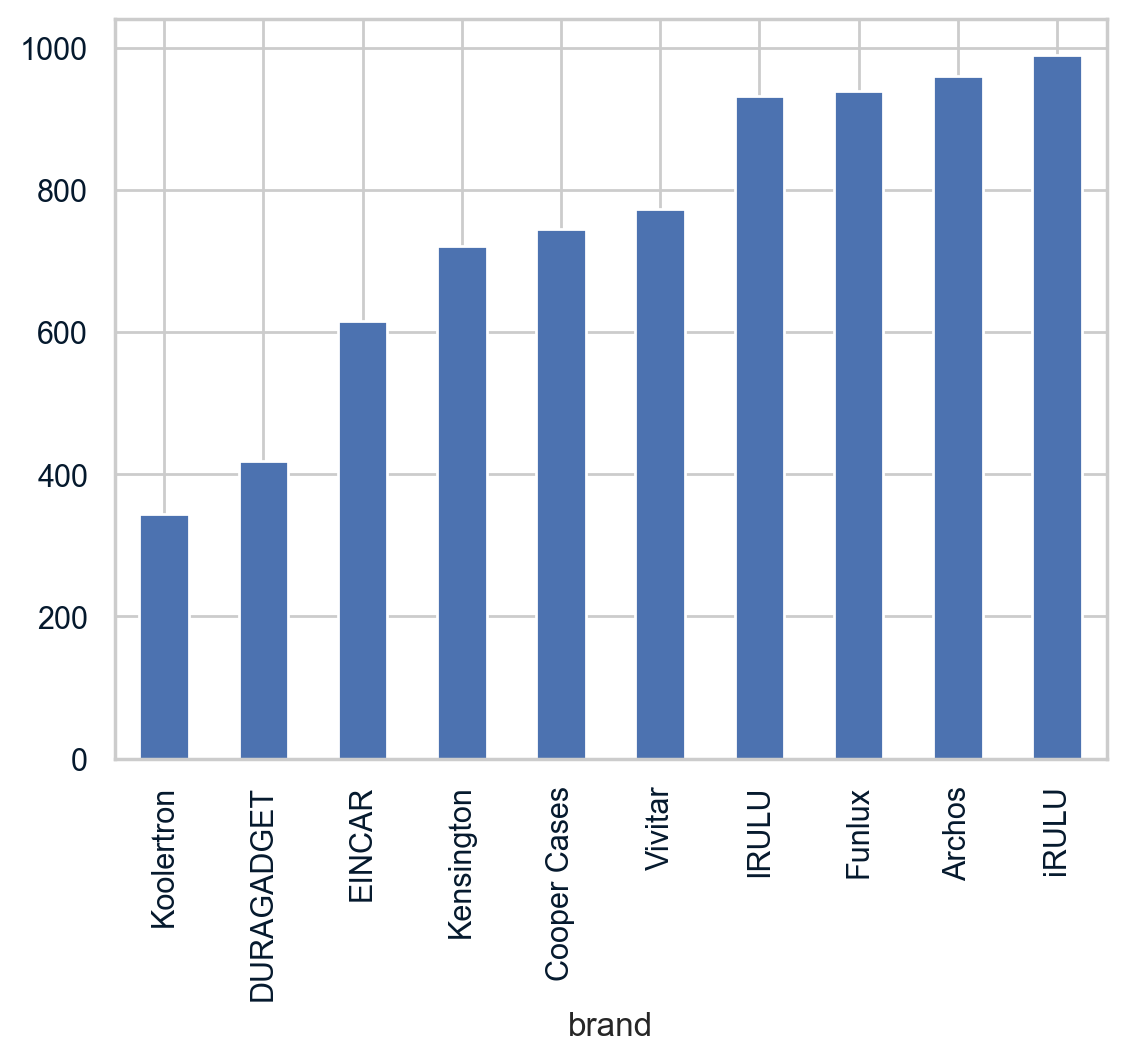

In [40]:
# What product by brand name sold the least?

dataset.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

## We can see that the brand name of Koolertron sold the least followed closely with DURAGADGET.

<Axes: xlabel='category'>

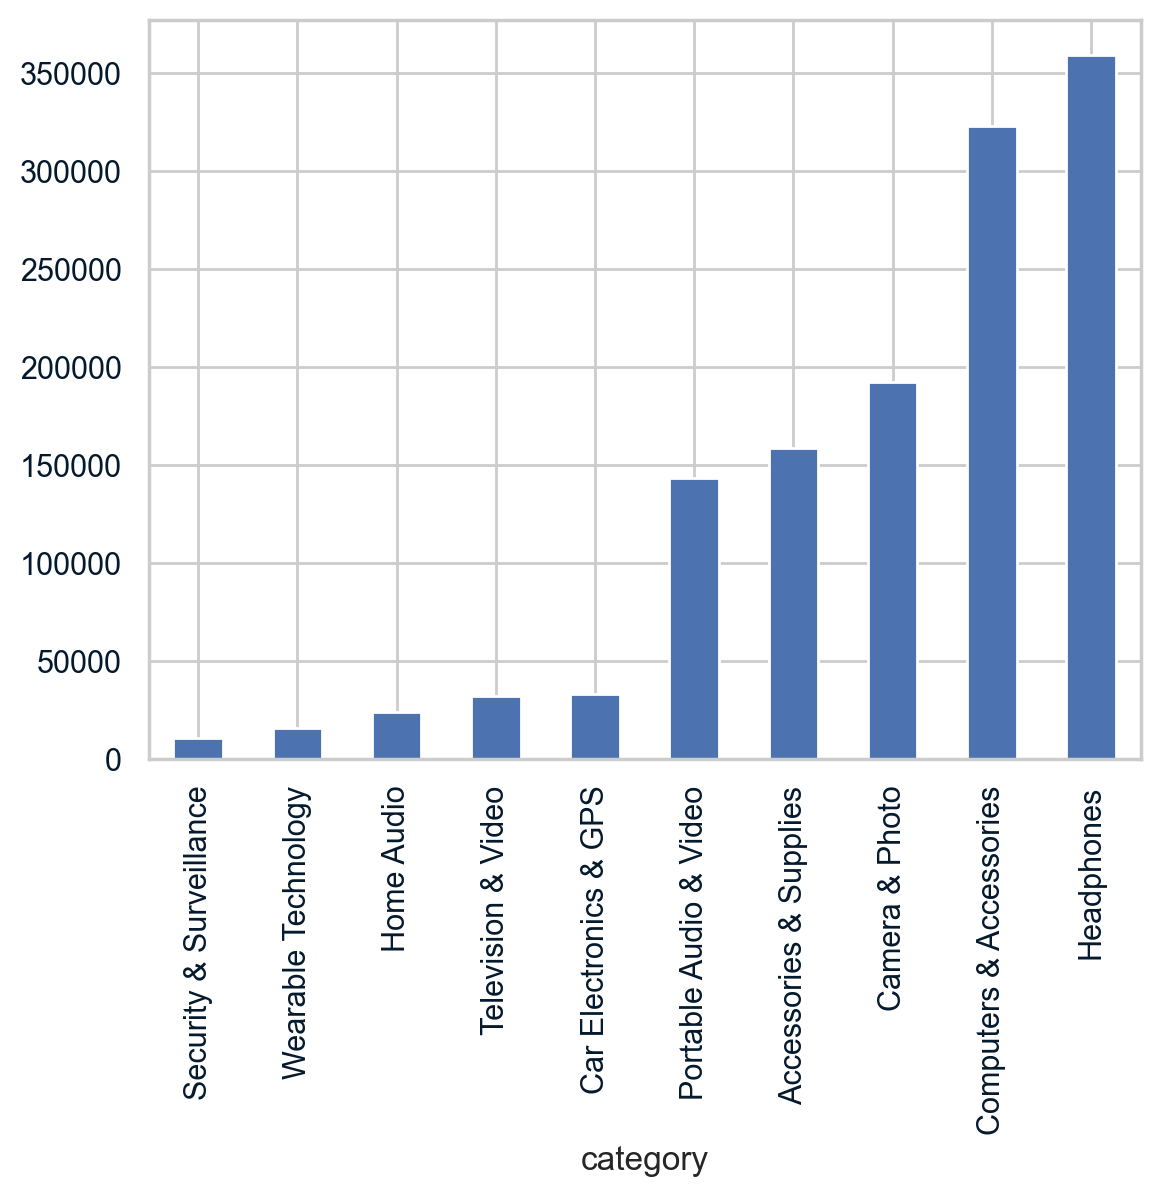

In [41]:
# What product by category sold the least?

dataset.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

## We can see that the category of Security and Surveillance sold the least.

<Axes: ylabel='rating'>

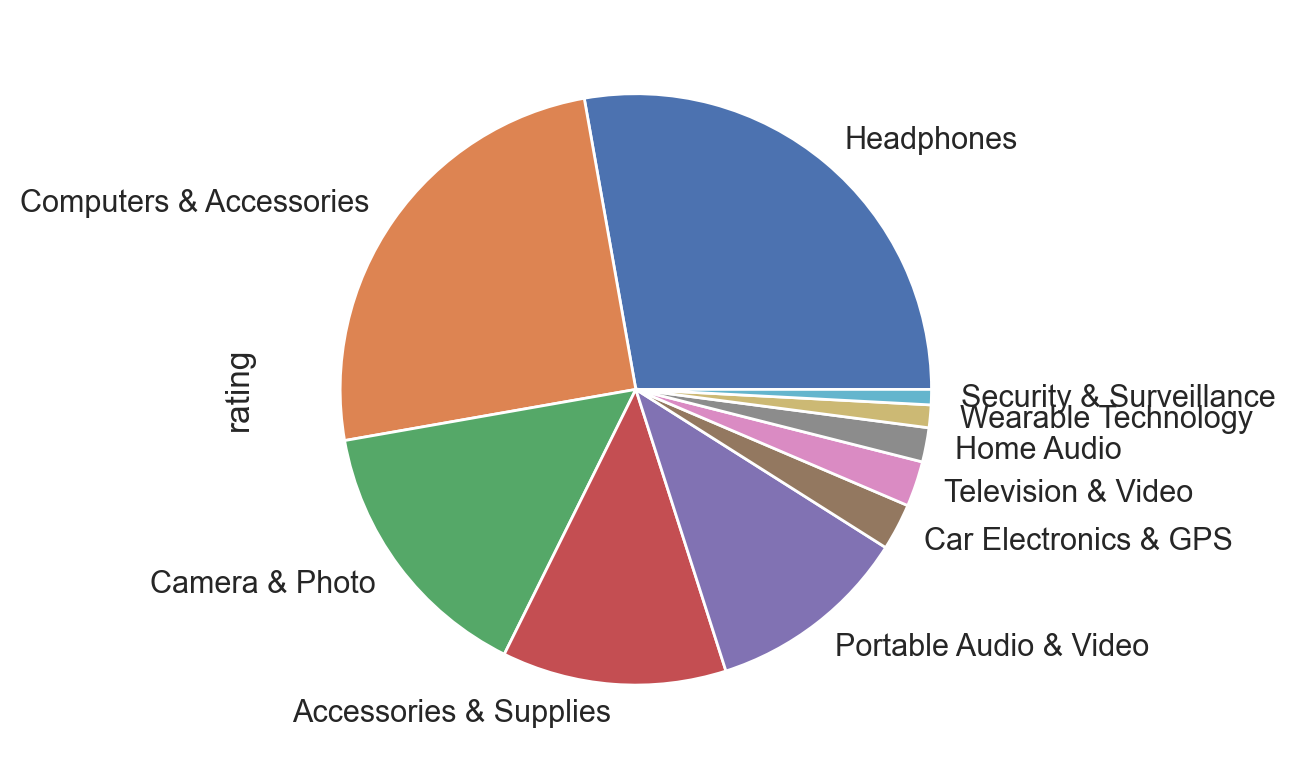

In [42]:
# category percentage sales

dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

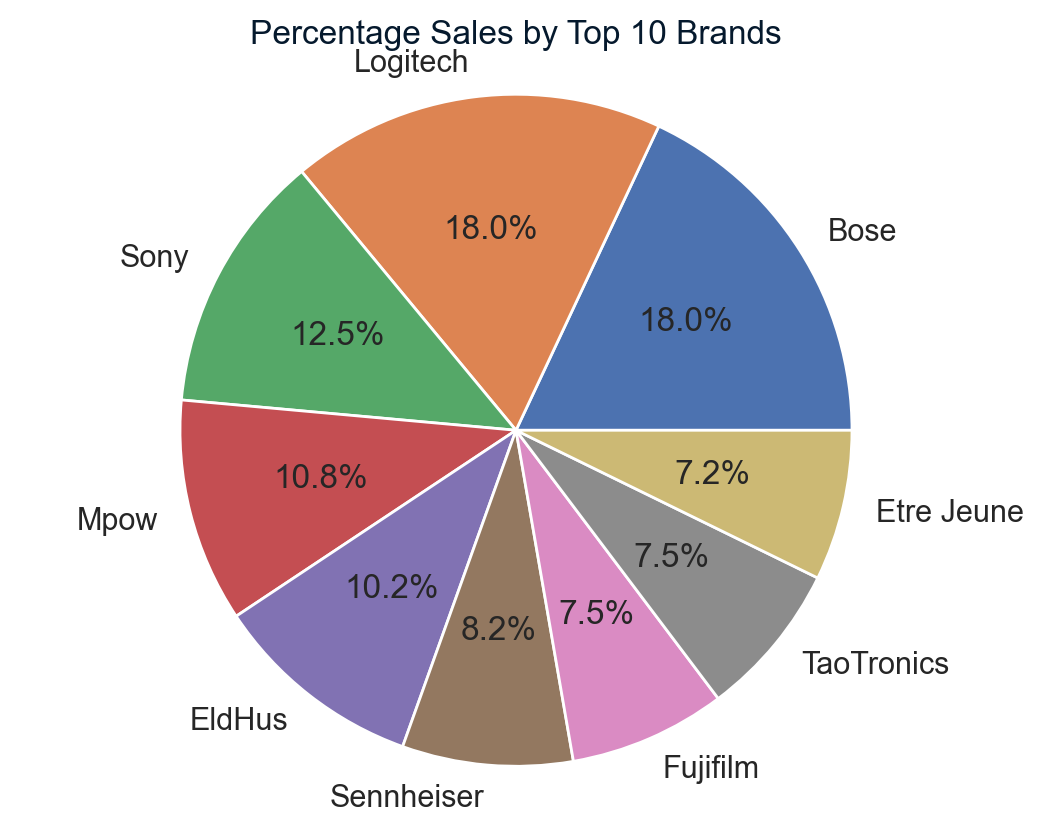

In [45]:
import matplotlib.pyplot as plt

# Filter out rows with 'nan' in the 'brand' column
filtered_data = dataset[dataset['brand'].notna()]

# Group by 'brand' and count the number of sales per brand
brand_sales = filtered_data.groupby('brand')['rating'].count().sort_values(ascending=False).head(10)

# Remove 'nan' from the top 10 brands (if exists)
brand_sales = brand_sales.drop(index='nan', errors='ignore')

# Plot the pie chart
brand_sales.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Percentage Sales by Top 10 Brands')
plt.ylabel('')
plt.show()


## We can see that the brand name of Bose and Logitech had the most sales

# Conclusion of our product analysis:

1. We can see that the year 2015 had the best sales.
2. The month of January had the best sales.
3. We can see that the brands Bose and Logitech sold the most
4. We can see that the category of Headphones sold the most.
5. We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.
6. We can see that the category of Security and Surveillance sold the least.

# Sales Analysis

In [46]:
# the distribution of ratings

dataset['rating'].value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

## The most of the ratings are 5.

In [47]:
# what was the best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

year
2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: count, dtype: int64

## 2015 was the best year of sales

In [48]:
# what was the best month of sales

dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

month
1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: count, dtype: int64

## January was the best month of sales

In [49]:
# drop all null values

dataset.dropna(inplace=True)

# check for missing values

dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

### FINDING ANSWERS WITH THE DATA WE HAVE WITH VISUALIZATIONS

<Axes: xlabel='rating', ylabel='count'>

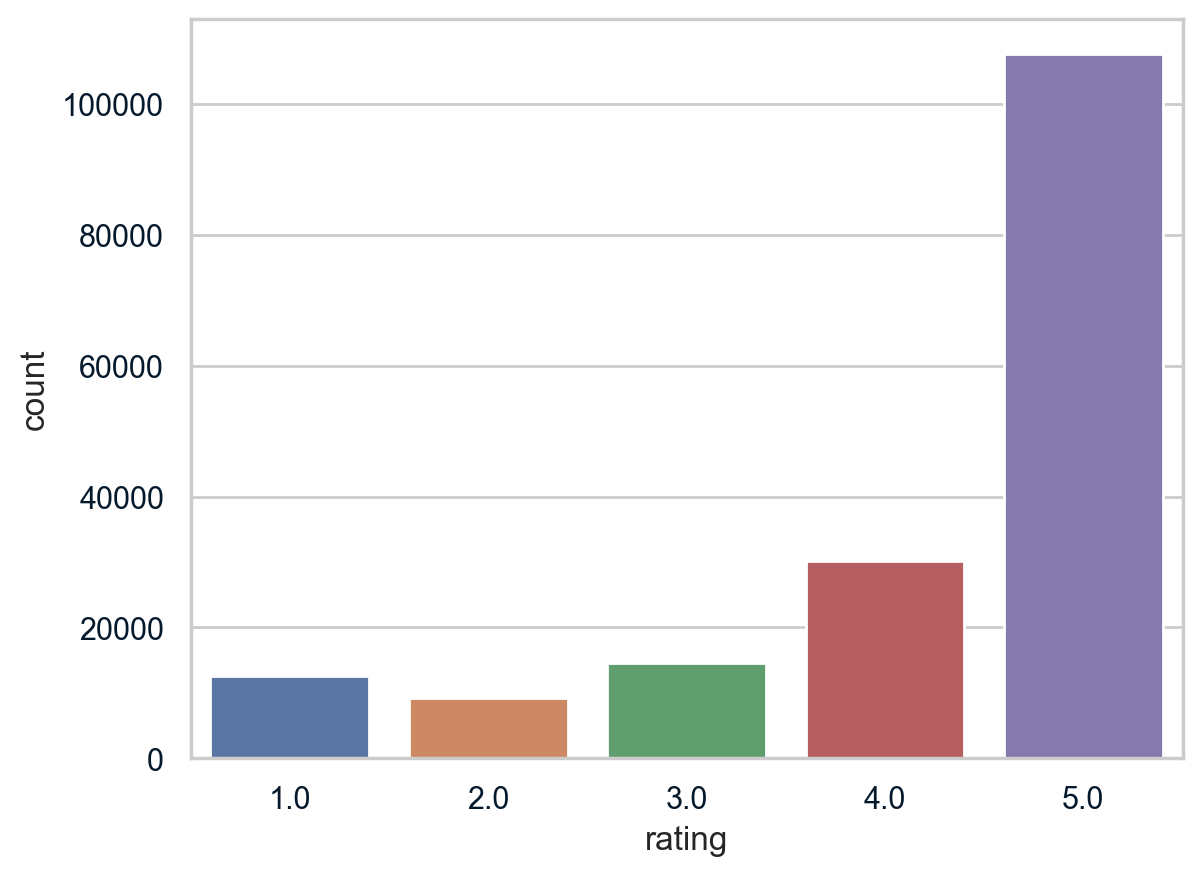

In [50]:
# the distribution of ratings 

sns.countplot(x='rating', data=dataset)

In [51]:
# the distribution of ratings

# The distribution of ratings is as follows:

# most of the ratings are 5

dataset['rating'].value_counts()

rating
5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: count, dtype: int64

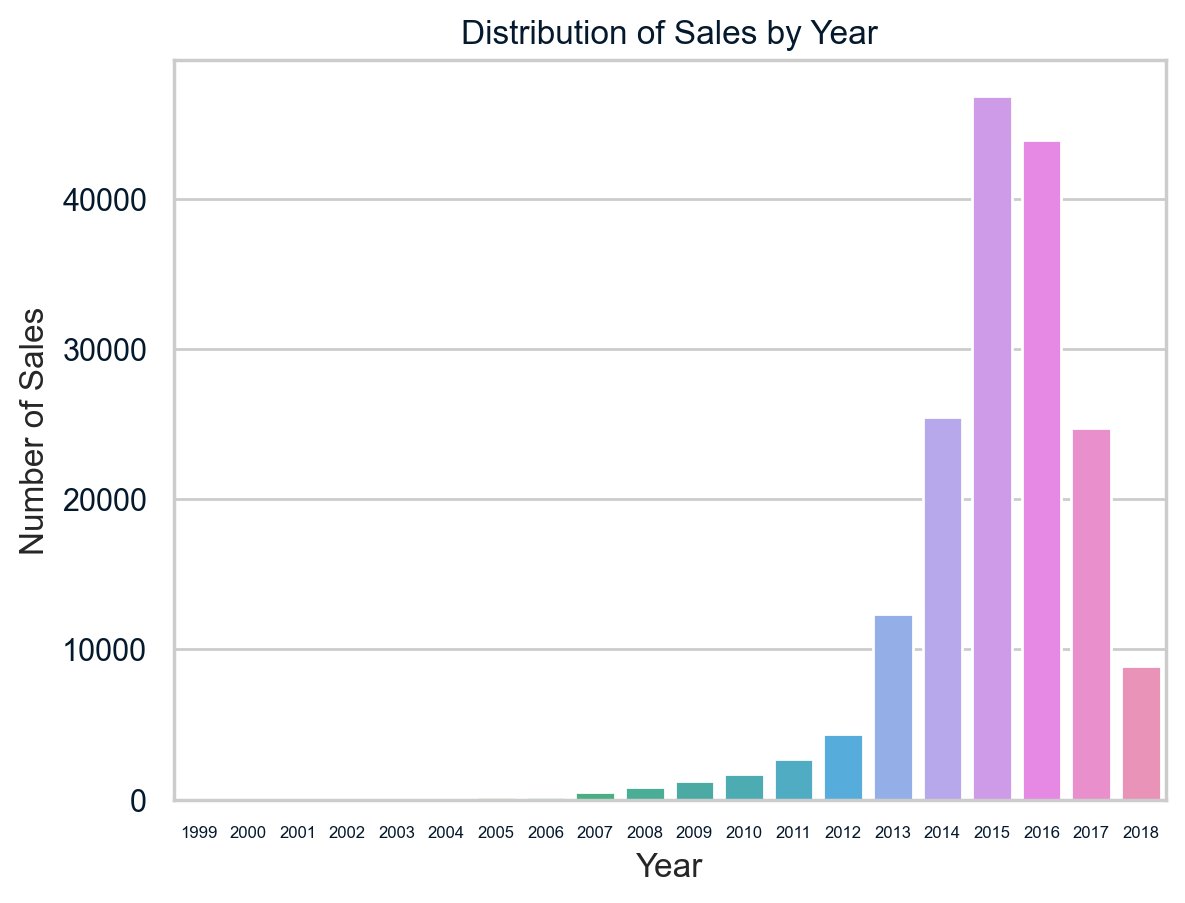

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sales by year
sns.countplot(x='year', data=dataset)

# Adjust the font size of the x-axis labels
plt.xticks(fontsize=6)

# Display the plot
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sales by Year')
plt.show()


## 2015 was the best year of sales

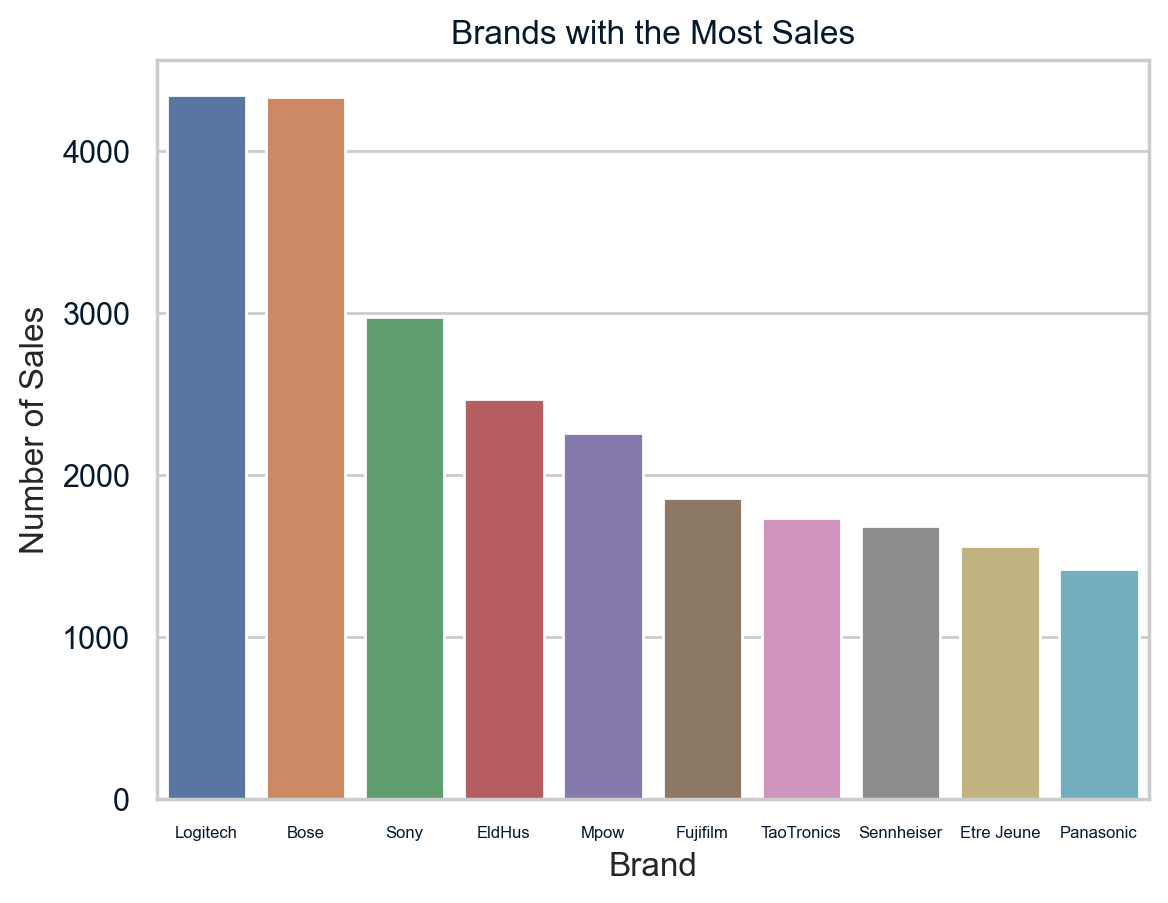

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot of brands with the most sales
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:11].index)

# Adjust the font size of the x-axis labels
plt.xticks(fontsize=6)

# Display the plot
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.title('Brands with the Most Sales')
plt.show()


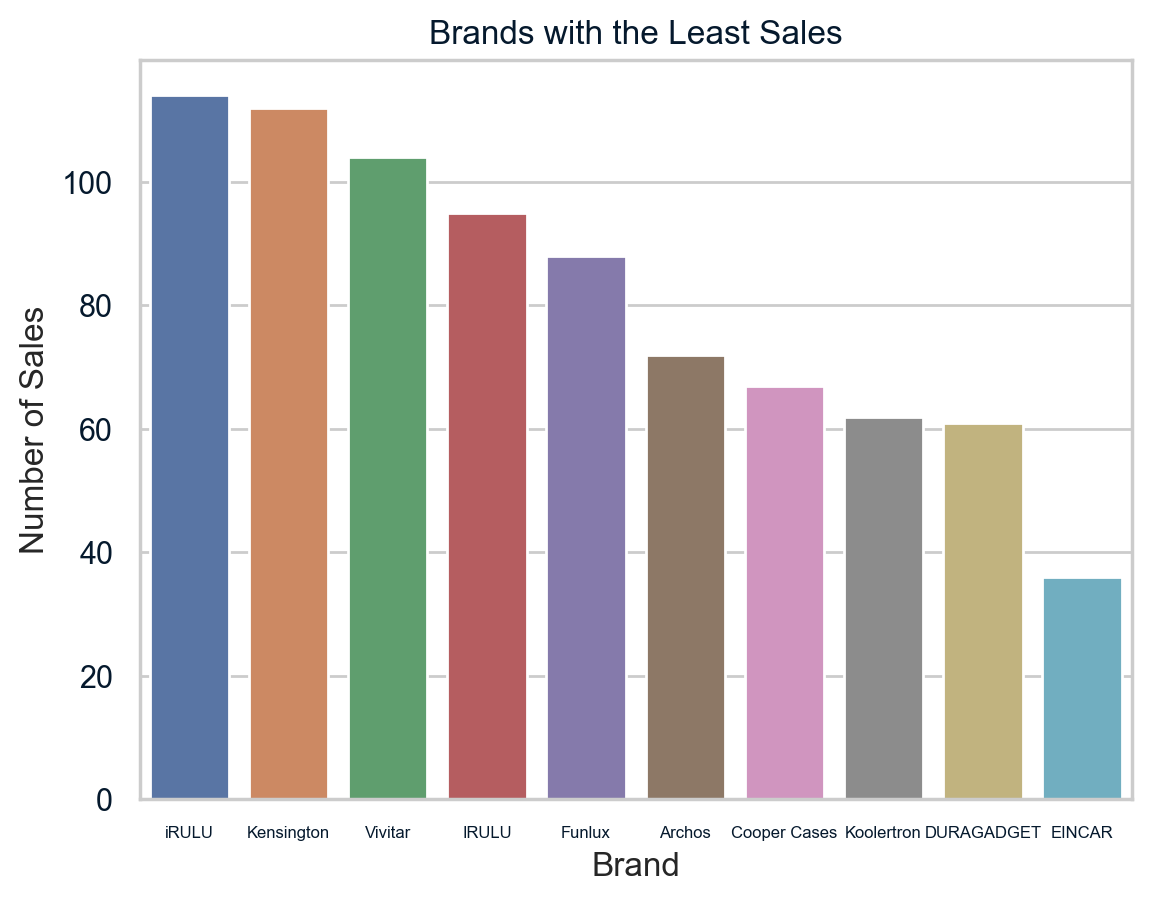

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the countplot of brands with the least sales
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)

# Adjust the font size of the x-axis labels
plt.xticks(fontsize=6)

# Display the plot
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.title('Brands with the Least Sales')
plt.show()


## We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

## Logitech & Bose had the most sales followed by Sony.

<Axes: xlabel='brand', ylabel='count'>

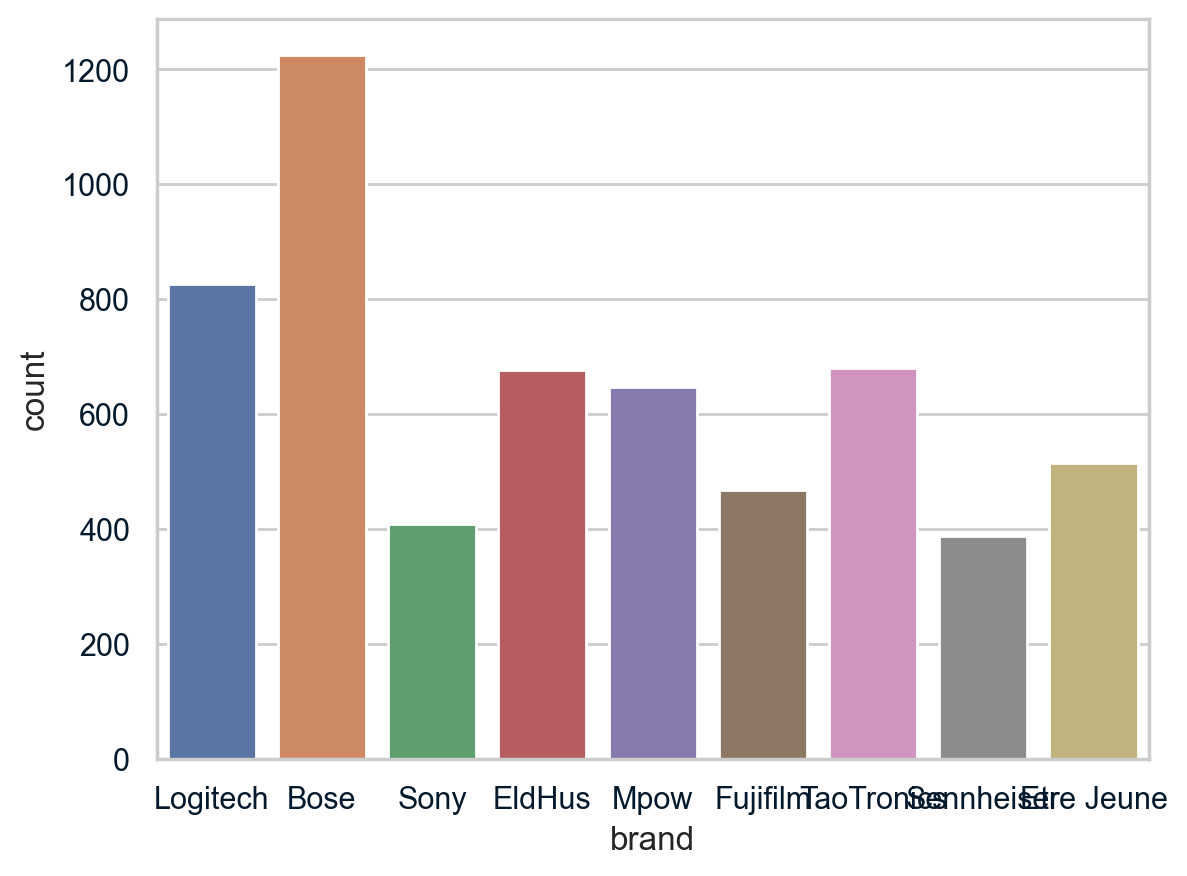

In [61]:
# brands with the most sales in 2016

sns.countplot(x='brand', data=dataset[dataset['year'] == 2016], order=dataset['brand'].value_counts().iloc[1:10].index)

## in 2016 Bose overtook Logitech to have the most sales.  TaoTronics had the third most sales that year

<Axes: xlabel='brand', ylabel='count'>

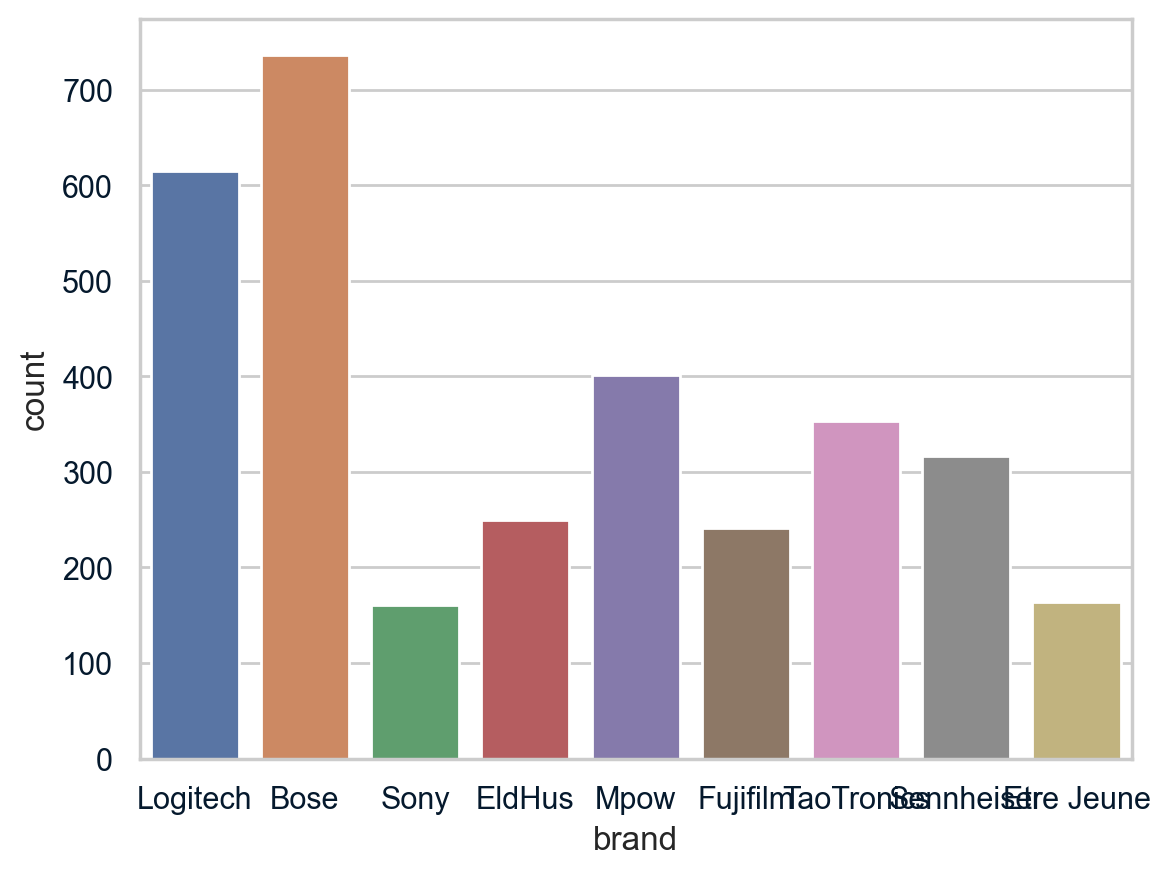

In [62]:
# brands with the most sales in 2017

sns.countplot(x='brand', data=dataset[dataset['year'] == 2017], order=dataset['brand'].value_counts().iloc[1:10].index)

## the top 3 products sold in 2017 were Bose, Logitech and Mpow.

<Axes: xlabel='brand', ylabel='count'>

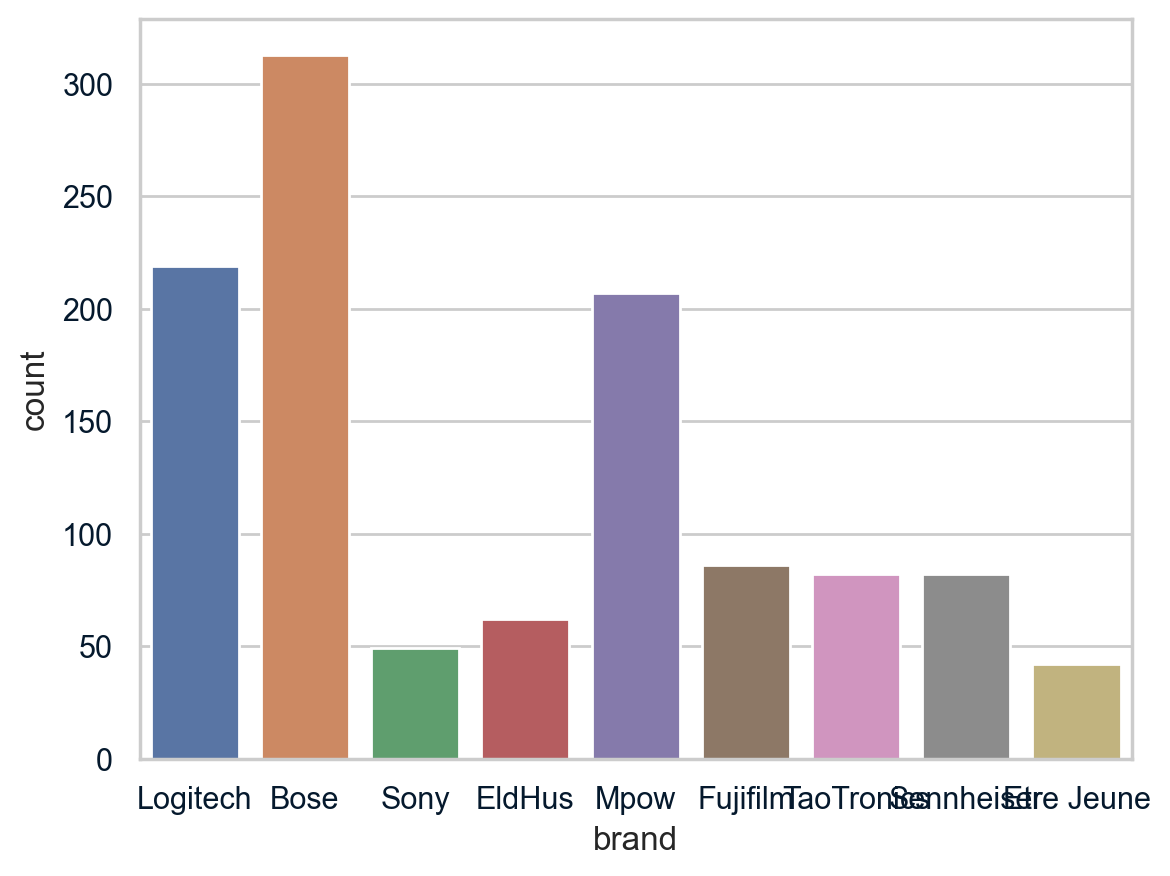

In [63]:
# brands with the most sales in 2018

sns.countplot(x='brand', data=dataset[dataset['year'] == 2018], order=dataset['brand'].value_counts().iloc[1:10].index)

## For 2018, Bose was the most sold for a third year in a row followed by Logitech while Mpow was the third most sold.

<Axes: xlabel='month', ylabel='count'>

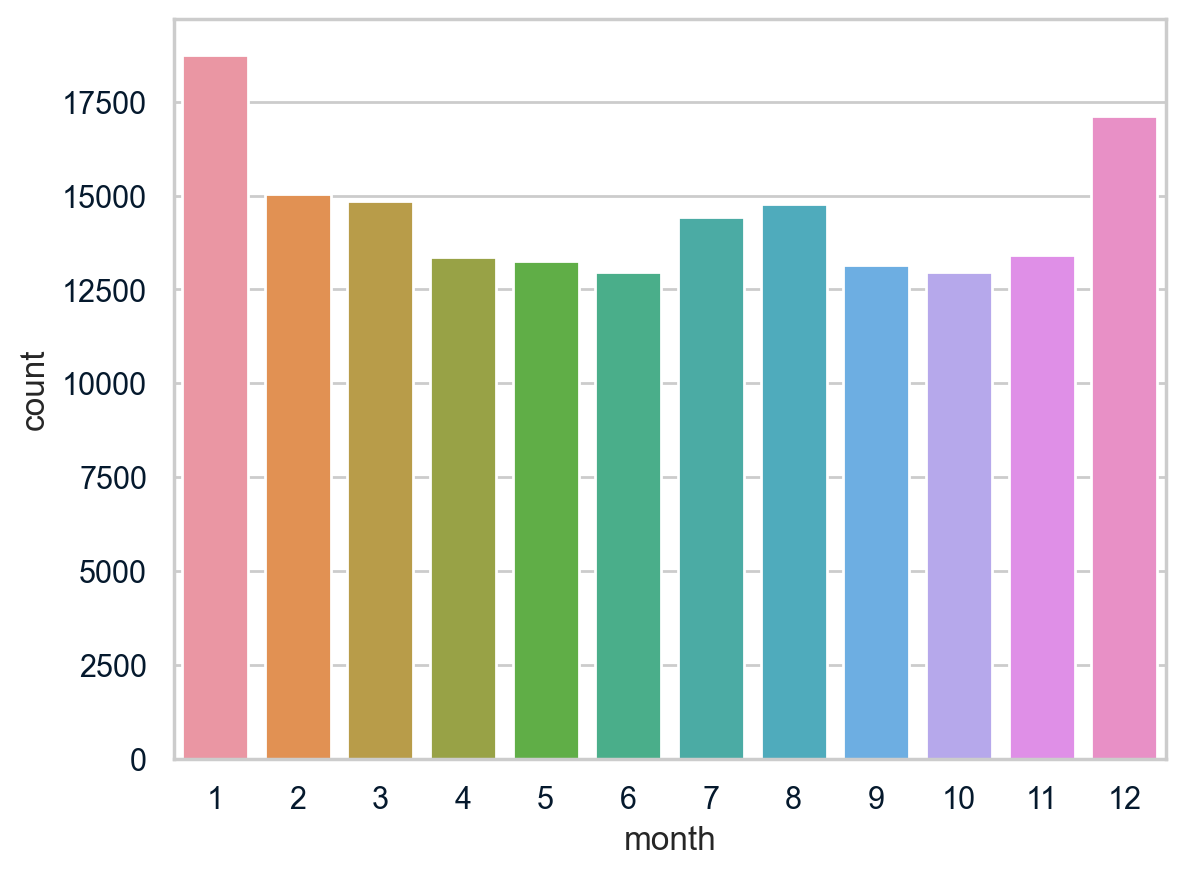

In [64]:
# month with most sales

sns.countplot(x='month', data=dataset)

## January[#1] was the month with the most sales

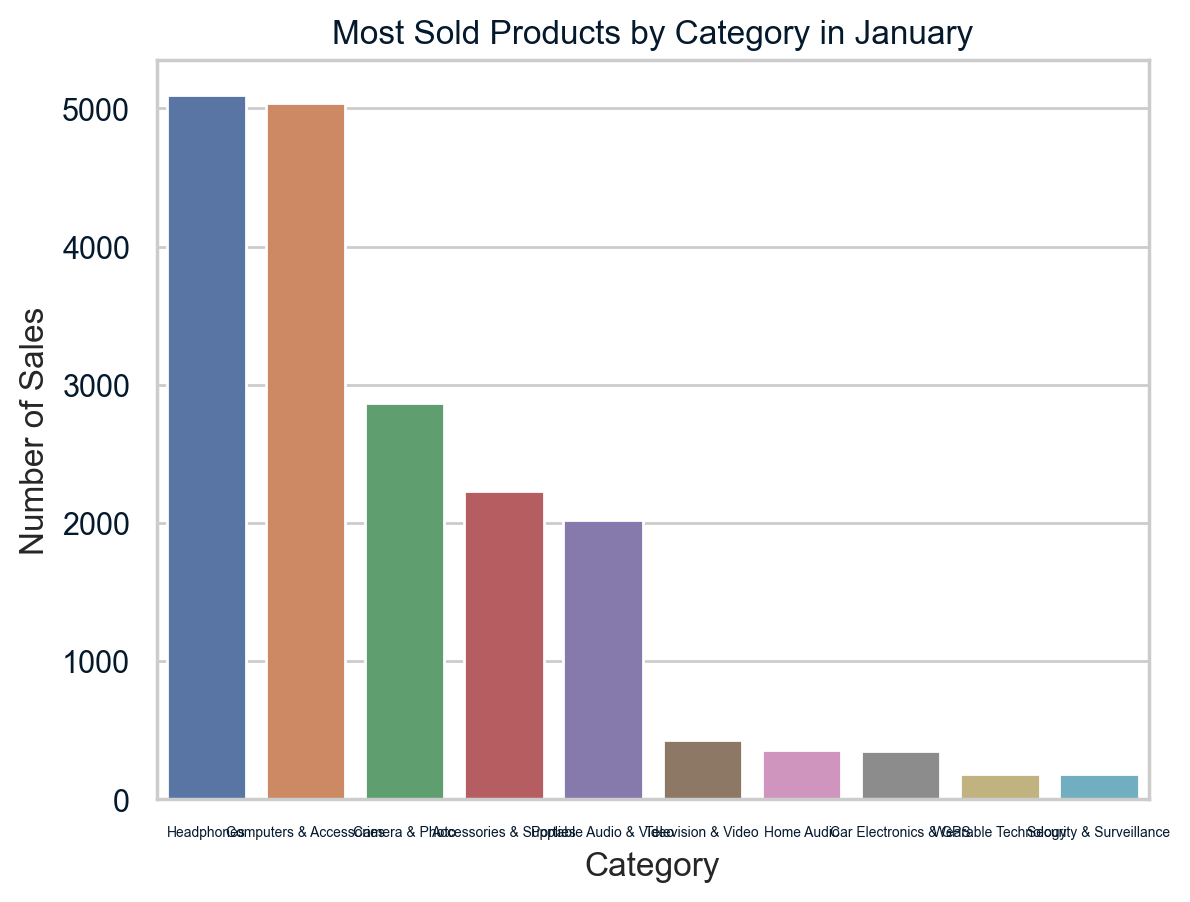

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for January
january_data = dataset[dataset['month'] == 1]

# Plot the countplot of categories with the most sales in January
sns.countplot(x='category', data=january_data, order=january_data['category'].value_counts().iloc[:10].index)

# Adjust the font size of the x-axis labels
plt.xticks(fontsize=5)

# Display the plot
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.title('Most Sold Products by Category in January')
plt.show()


## The top 3 products sold in January were Computers & Accesories, Camera & Photo and Accesories & Supplies.

<Axes: xlabel='category', ylabel='count'>

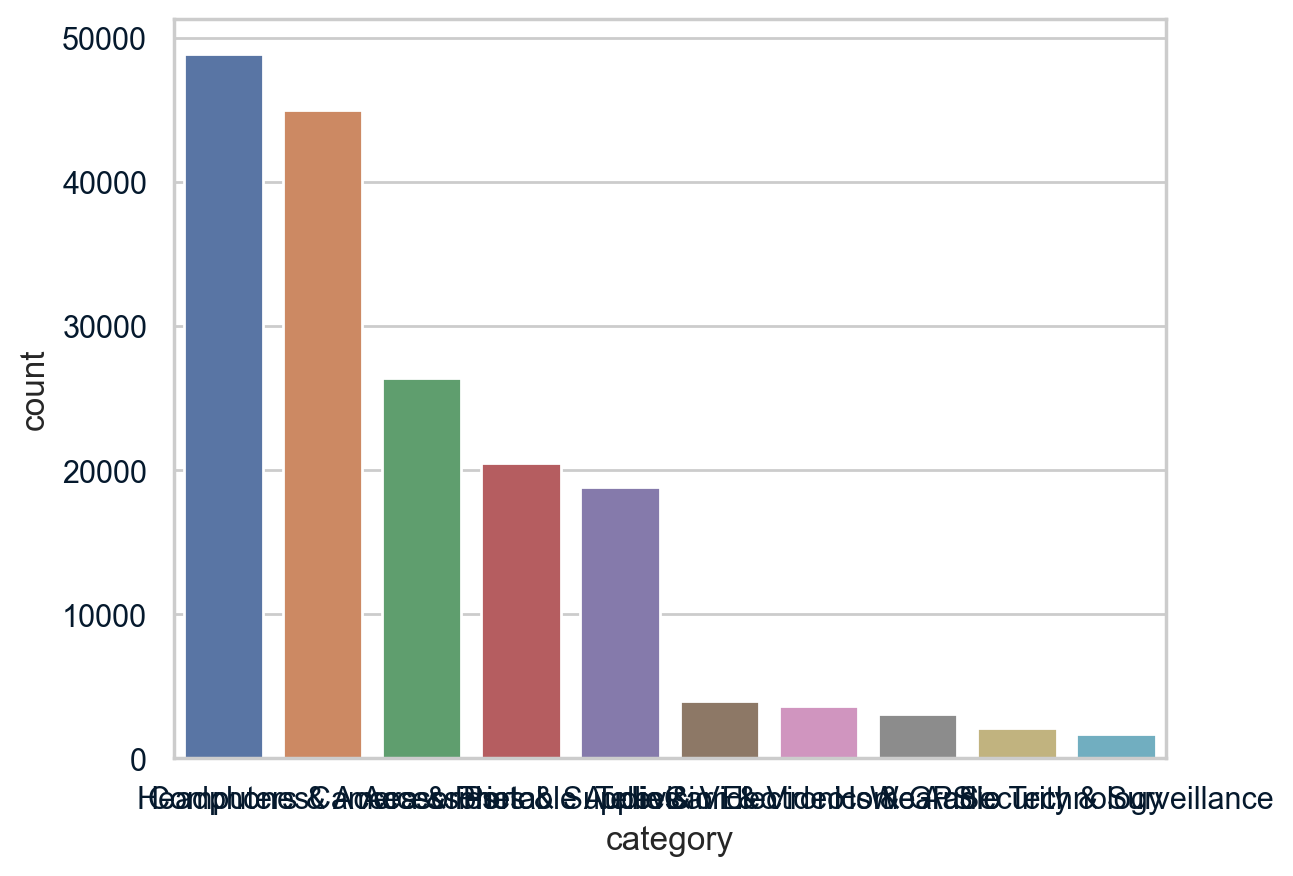

In [68]:
# Category with the least sales

sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index)

## The category with the least sales was Security & Surveillance while the most sales were Headphones.

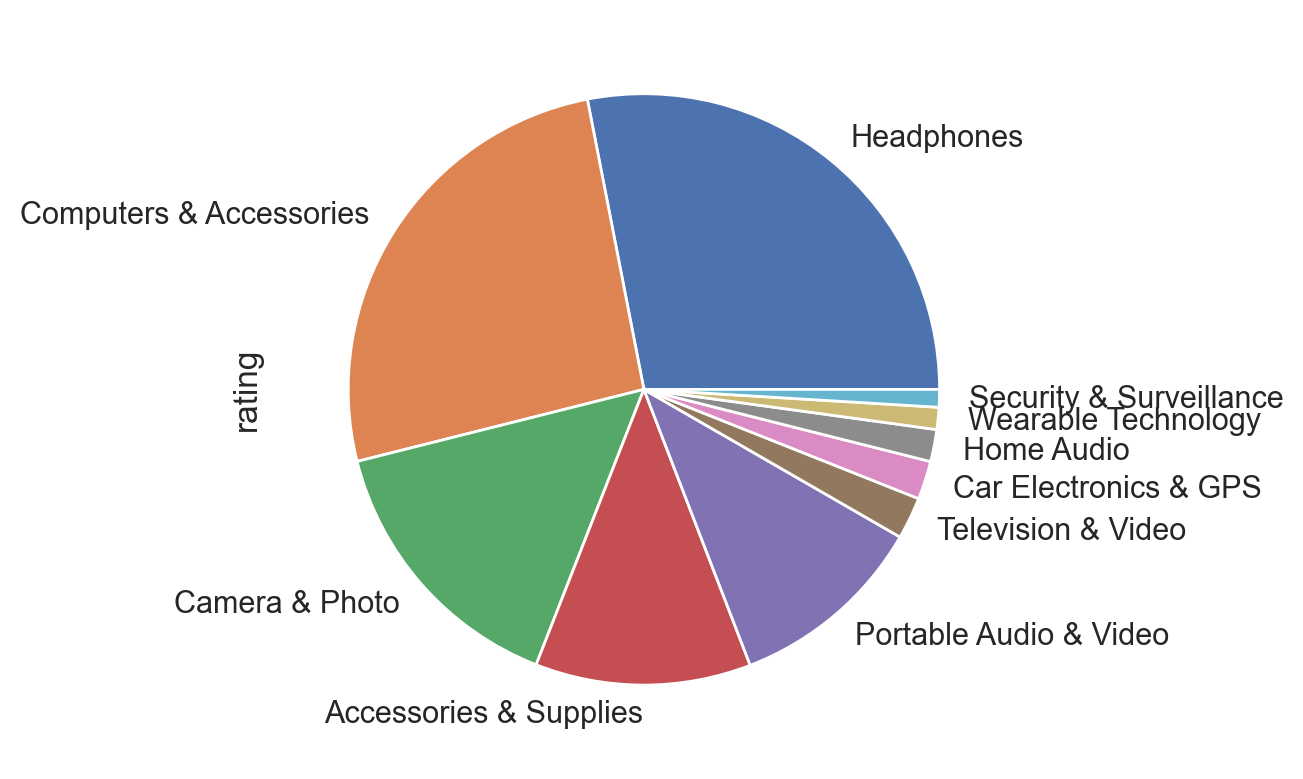

In [69]:
# distribution of sales presented in a pie chart

dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

# white background

sns.set_style('white')

# Conclusion of our sales analysis

1. We can see that the year 2015 had the best sales.
2. The month of January had the best sales.
3. We can see that the brands Bose and Logitech sold the most
4. We can see that the category of Headphones sold the most.
5. We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.
6. We can see that the category of Security and Surveillance sold the least.